## MNIST 데이터

### Tensorflow에서 MNIST 읽기

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

- 각 픽셀이 255값이 최댓값이어서 0~1사이의 값으로 조정(일종의 min max scaler)

In [2]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### one-hot-encoding
- 이 타이밍에 one-hot-encoding을 해야 한다.
- 그런데 또 하나의 방법이 loss함수를 sparse_categorical_crossentropy로 설정하면 같은 효과이다.
- 그래서 pass

### 모델 생성

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 일렬로 784개로 펼침
    tf.keras.layers.Dense(1000, activation='relu'), # 은닉층은 relu
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### 다시 한번 더 softmax란
- 출력 단위 여러개의 분류 문제로 나올 때, 출력 단위의 모두의 합을 1로 만들어주고
- 제일 큰 값을 답으로

### model.summary

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


### fit

In [5]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2251 - accuracy: 0.9343 - val_loss: 0.1127 - val_accuracy: 0.9677
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0853 - accuracy: 0.9751 - val_loss: 0.0750 - val_accuracy: 0.9762
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.0705 - val_accuracy: 0.9775
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0664 - val_accuracy: 0.9788
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0618 - val_accuracy: 0.9818
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.0750 - val_accuracy: 0.9787
Epoch 

### acc와 loss 시각화

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

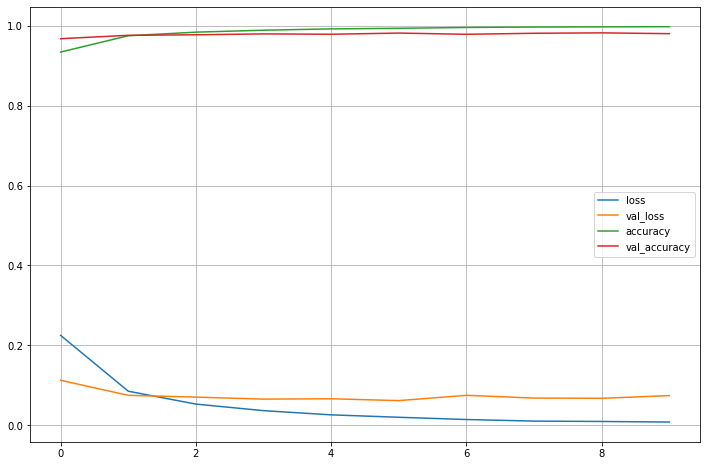

In [7]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

- 이상적인 수렴 상황이다

In [8]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9803
Test loss:  0.07433494925498962
Test accuracy:  0.9803000092506409


- 머신러닝에서 pca를 이용해서 knn을 했을 때 나온 93%보다 5%쯤 향상되었다

In [9]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [10]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### 틀린 데이터의 index

In [11]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

197

In [12]:
import random

samples = random.choices(population=wrong_result, k=16)

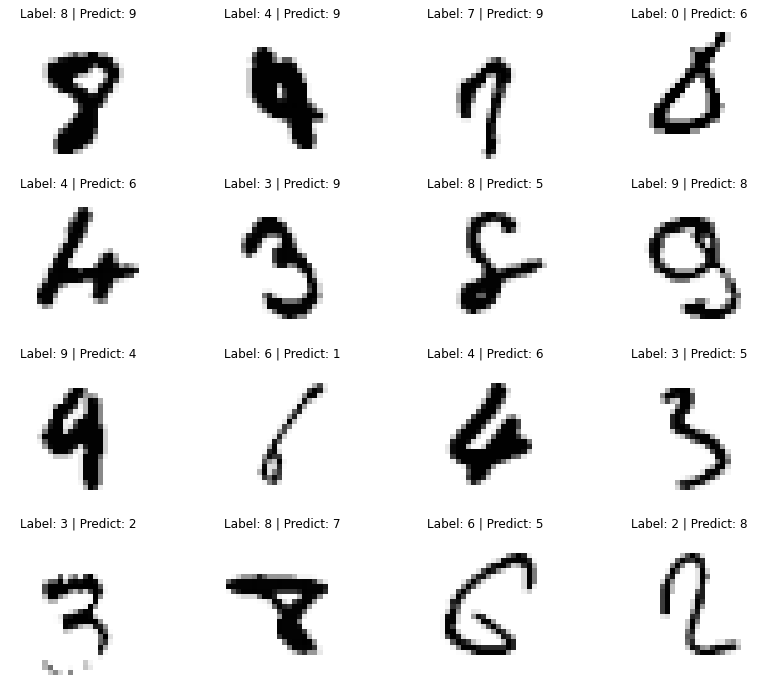

In [13]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys')
    plt.title('Label: ' + str(y_test[n]) + ' | Predict: ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

---

## MNIST fashion 데이터
- 숫자로 된 MNIST데이터처럼 28*28 크기의 패션과 관련된 10개 종류의 데이터

### 데이터 읽기

In [14]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

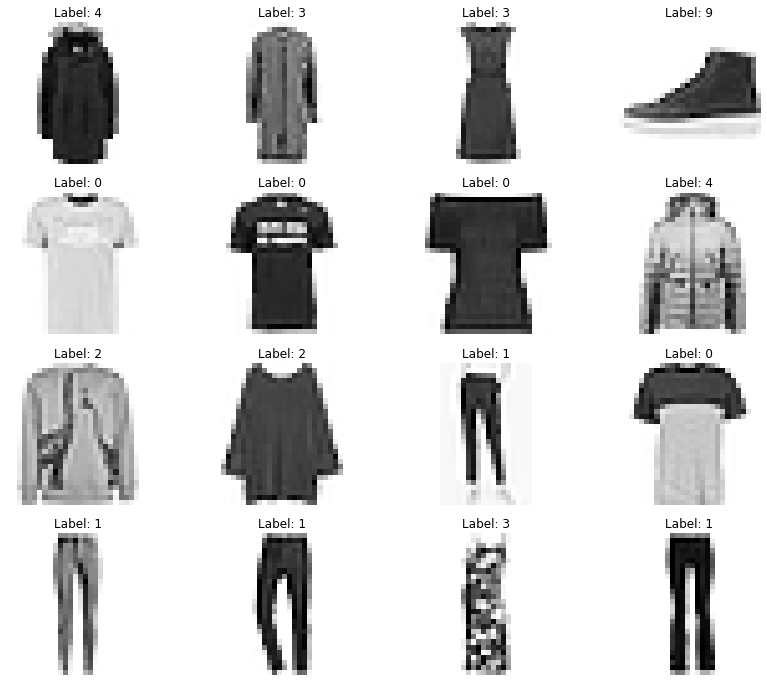

In [15]:
samples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28), cmap='Greys')
    plt.title('Label: ' + str(y_train[n]))
    plt.axis('off')

plt.show()

### 모델은 숫자 때와 동일한 구조로 두자

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4831 - accuracy: 0.8287 - val_loss: 0.4105 - val_accuracy: 0.8517
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3577 - accuracy: 0.8708 - val_loss: 0.4031 - val_accuracy: 0.8555
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3219 - accuracy: 0.8826 - val_loss: 0.3566 - val_accuracy: 0.8731
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2961 - accuracy: 0.8901 - val_loss: 0.3381 - val_accuracy: 0.8773
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2758 - accuracy: 0.8969 - val_loss: 0.3262 - val_accuracy: 0.8855
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2650 - accuracy: 0.9012 - val_loss: 0.3430 - val_accuracy: 0.8802
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2489 - accuracy: 0.9080 - val_loss: 0.3241 - val_accuracy: 0.8854
Epoch 

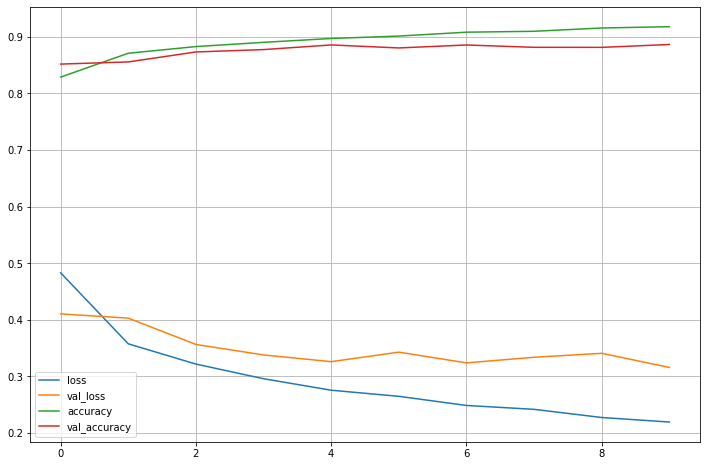

In [19]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

- val_loss와 train loss사이에 간격이 발생한다

### 테스트 데이터 accuracy

In [20]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.8863
Test loss:  0.3160020112991333
Test accuracy:  0.8863000273704529


### 틀린 데이터 추출

In [21]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [22]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [23]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

1137

In [24]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[8869,
 1343,
 8658,
 5065,
 5435,
 8752,
 9692,
 2840,
 8710,
 8324,
 3087,
 2828,
 1005,
 9953,
 9953,
 1968]

### 시각화

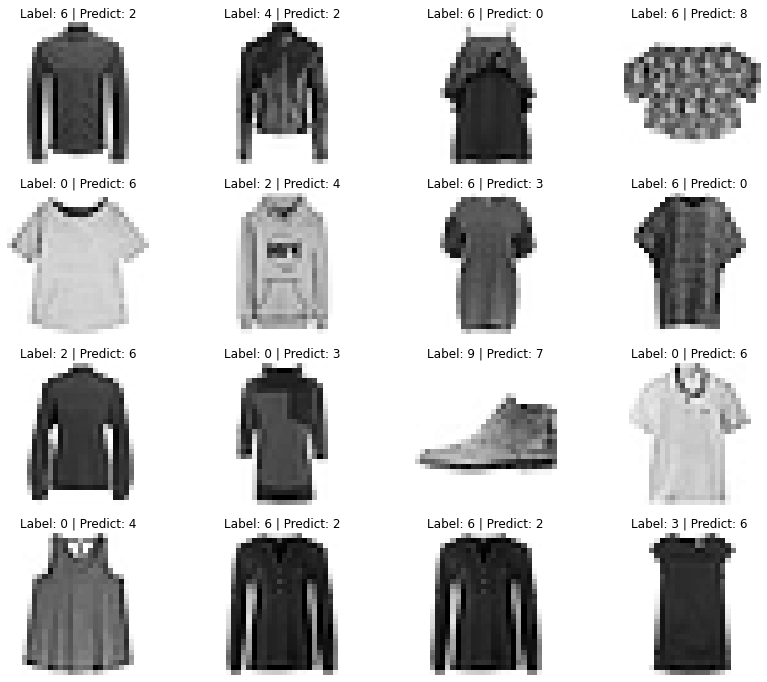

In [25]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label: ' + str(y_test[n]) + ' | Predict: ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

0 : 티셔츠
1 : 바지
2 : 스웨터
3 : 드레스
4 : 코트
5 : 샌들
6 : 셔츠
7 : 운동화
8 : 가방
9 : 부츠